# Problem Statement

# Flow of the Project

Reading the data in python
Defining the problem statement
Identifying the Target variable
Looking at the distribution of Target variable
Basic Data exploration
Rejecting useless columns
Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
Feature Selection based on data distribution
Outlier treatment
Missing Values treatment
Visual correlation analysis
Statistical correlation analysis (Feature Selection)
Converting data to numeric for ML
Sampling and K-fold cross validation
Trying multiple classification algorithms
Selecting the best Model
Deploying the best model in production

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
#reading the dataset

data = pd.read_csv('Ad click data.csv')
data

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0


In [4]:
AdClickData=pd.read_csv("Ad click Data.csv", encoding='latin')
print('Shape before deleting duplicate values:', AdClickData.shape)

Shape before deleting duplicate values: (6657, 14)


In [5]:
# remove duplicate row if any

AdClickData = AdClickData.drop_duplicates()
print('Shape before deleting duplicate values:', AdClickData.shape)

Shape before deleting duplicate values: (6657, 14)


In [6]:
data.shape

(6657, 14)

In [7]:
data.head(10)

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
5,1475237,35.98,38,60813.00,125.20,product_10,Guernsey,City_2,Yes,Early-Morning,Saturday,July,2020,1
6,5578680,52.70,26,49283.00,140.83,product_1,Anguilla,City_2,Yes,Early-Morning,Tuesday,January,2020,1
7,4037672,82.58,23,61601.05,183.42,product_8,Switzerland,City_4,No,Noon,Sunday,July,2020,0
8,5792642,70.96,22,69874.18,198.72,product_29,Niue,City_3,No,Mid-Night,Tuesday,April,2020,0
9,9377192,56.91,50,21773.22,146.44,product_18,Norfolk Island,City_4,No,Early-Morning,Friday,April,2020,1


In [8]:
data.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

# Defining the problem statement:
## Create a Predictive model which can tell whether a logged in user will click on a given product advertisement or not?
    Target Variable: Clicked
    Predictors: Time_Spent, Age, Avg_Income, Internet_Usage, Ad_Topic... etc.
    Clicked=1 means the ad was clicked.
    Clicked=0 means the ad was NOT clicked.

<AxesSubplot:xlabel='Clicked'>

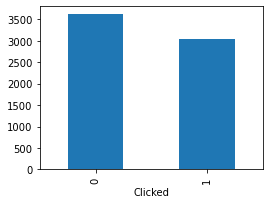

In [9]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=AdClickData.groupby('Clicked').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [10]:
data['Clicked'].value_counts()

0    3619
1    3038
Name: Clicked, dtype: int64

# Basic Data Exploration

Does this column affect the values of the Target variable? 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [17]:
data.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [14]:
data.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning

# Basic Data Exploration Results
### Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

    The selected columns in this step are not final, further study will be done and then a final list will be created

    VistID: Qualitative. Rejected. This column does not affect the ad click
    Time_Spent: Continuous. Selected.
    Age: Continuous. Selected.
    Area_Income: Continuous. Selected.
    Internet_Usage: Continuous. Selected.
    Ad_Topic: Categorical. Selected.
    Country_Name: Qualitative. Rejected. This column has very high cardinality
    City_Code: Categorical. Selected.
    Male: Categorical. Selected.
    Time_Period: Categorical. Selected.
    Weekday: Categorical. Selected.
    Month: Categorical. Selected.
    Year: Qualitative. Rejected. This column does not affect the ad click.
    Clicked: Categorical. Selected. This is the Target Variable!

In [ ]:
#remove unuseful data

colToRemove = ['VistID','Country_Name','Year']
data = data.drop(colToRemove,axis=1)
data.head()

# Visual Exploratory Data Analysis
    Categorical variables: Bar plot
    Continuous variables: Histogram

Categorical Predictors: "Ad_Topic", "City_code", "Male" ,"Time_Period", "Weekday", "Month"

In [19]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6
                                                                      ))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################


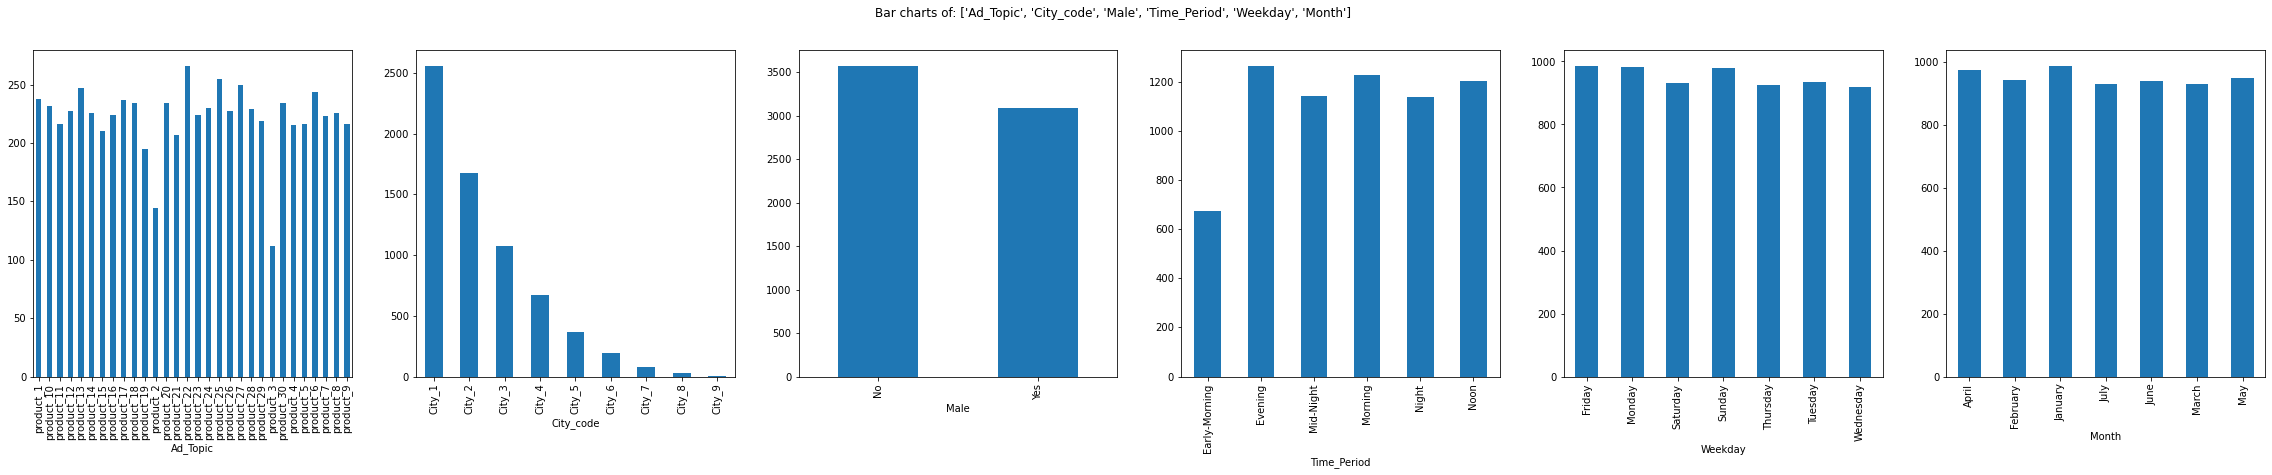

In [20]:
# Calling the function
PlotBarCharts(inpData=data, colsToPlot=["Ad_Topic","City_code", "Male",
                                               "Time_Period", "Weekday","Month"])

Ideal bar chart looks like the chart of "Weekday" and "Month" column
Selected Categorical Variables: All the categorical variables are selected for further analysis.

"Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'Time_Spent'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Avg_Income'}>,
        <AxesSubplot:title={'center':'Internet_Usage'}>]], dtype=object)

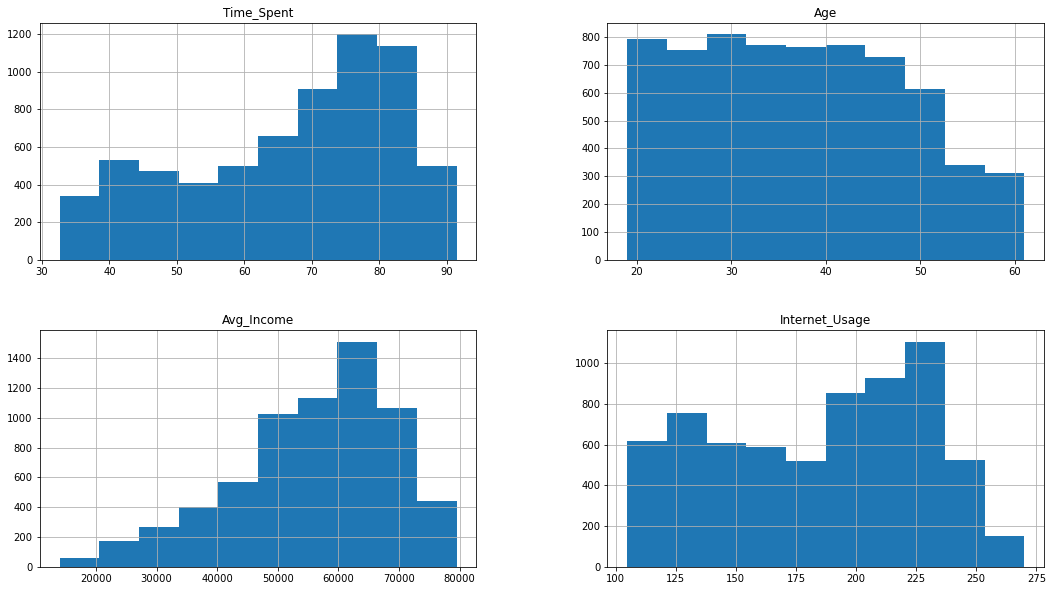

In [21]:
#Plotting histograms of multiple columns together
data.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(18,10))

data distribution for a single continuous variable.
The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.


Selected Continuous Variables:

Time_Spent : Selected.
Age: Selected.
Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
Internet_Usage: Selected.

# Outlier treatment

Outlier must be treated one column at a time. As the treatment will be slightly different for each column
Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data
Option-1: Delete the outlier Records. Only if there are just few rows lost.
Option-2: Impute the outlier values with a logical business value

# In this data none of the continuous predictors had outliers, hence treatment is not required.



# Missing values treatment

If a column has more than 30% data missing, then missing value treatment cannot be done.column must be rejected because too much information is missing.

    Delete the missing value rows if there are only few records
    Impute the missing values with MEDIAN value for continuous variables
    Impute the missing values with MODE value for categorical variables
    Interpolate the values based on nearby values
    Interpolate the values based on business logic

In [22]:
#find missing values

data.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

# none of the columns have any missing values

# feature selection

finally choose the best columns(Features) which are correlated to the Target variable.
correlation values or ANOVA/Chi-Square tests.
it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.



# Visual exploration of relationship between variables
    Continuous Vs Continuous ---- Scatter Plot
    Categorical Vs Continuous---- Box Plot
    Categorical Vs Categorical---- Grouped Bar Plots

# Statistical measurement of relationship strength between variables
    Continuous Vs Continuous ---- Correlation matrix
    Categorical Vs Continuous---- ANOVA test
    Categorical Vs Categorical--- Chi-Square test

# In this case study the Target variable is categorical, hence below two scenarios will be present
    1. Categorical Target Variable Vs Continuous Predictor
    2. Categorical Target Variable Vs Categorical Predictor


In [23]:
ContinuousColsList=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]


import matplotlib.pyplot as plt



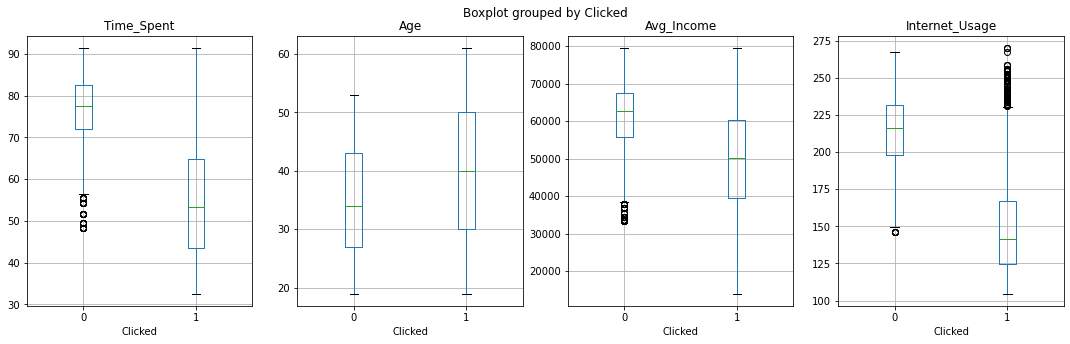

In [24]:
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

for PredictorCol , i in zip(ContinuousColsList,range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol,by='Clicked',figsize=(5,5),vert = True,ax=PlotCanvas[i])
    

# What should you look for in these box plots?

    These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

    If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

        @ For example, look at the first chart "Time_Spent" Vs "Clicked". The boxes are NOT in the same line! I can see the people who clicked on ads have lesser Time_Spent as compared to people who did not click, hence I have some logic to learn using ML algorithms. So this column is correlated with the Clicked column.
    
    The other other three charts also exhibit same characteristics, hence all four continuous predictors are correlated with the target variable.

    We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

    Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

    Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
    ANOVA Test result: Probability of H0 being true

In [25]:
def FunctionAnova(inpData,TargetVariable,ContinuousPredictorList):
    
    from scipy.stats import f_oneway
    SelectedPredictors = []  #emptylistfor final selected pred
    
    print("***** ANOVA RESULT ******")
    
    for predictor in ContinuousPredictorList:
        CategoryGroupList = inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResult = f_oneway(*CategoryGroupList)
        
        #if anova p value is <0.5 tht means we reject H0
        
        if (AnovaResult[1]<0.05):
            print(predictor,'is correlated with ',TargetVariable,'|P-Values:',AnovaResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)
            
        

In [26]:
ContinuousVariables=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
FunctionAnova(inpData=data, TargetVariable='Clicked', ContinuousPredictorList=ContinuousVariables)

***** ANOVA RESULT ******
Time_Spent is correlated with  Clicked |P-Values: 0.0
Age is correlated with  Clicked |P-Values: 6.40789044460054e-91
Avg_Income is correlated with  Clicked |P-Values: 0.0
Internet_Usage is correlated with  Clicked |P-Values: 0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

# All Four columns are correlated with Clicked (Target Variable).

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
    When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [27]:
CrossTabResult=pd.crosstab(index=data['Male'], columns=data['Clicked'])
CrossTabResult

Clicked,0,1
Male,,
No,1896,1675
Yes,1723,1363


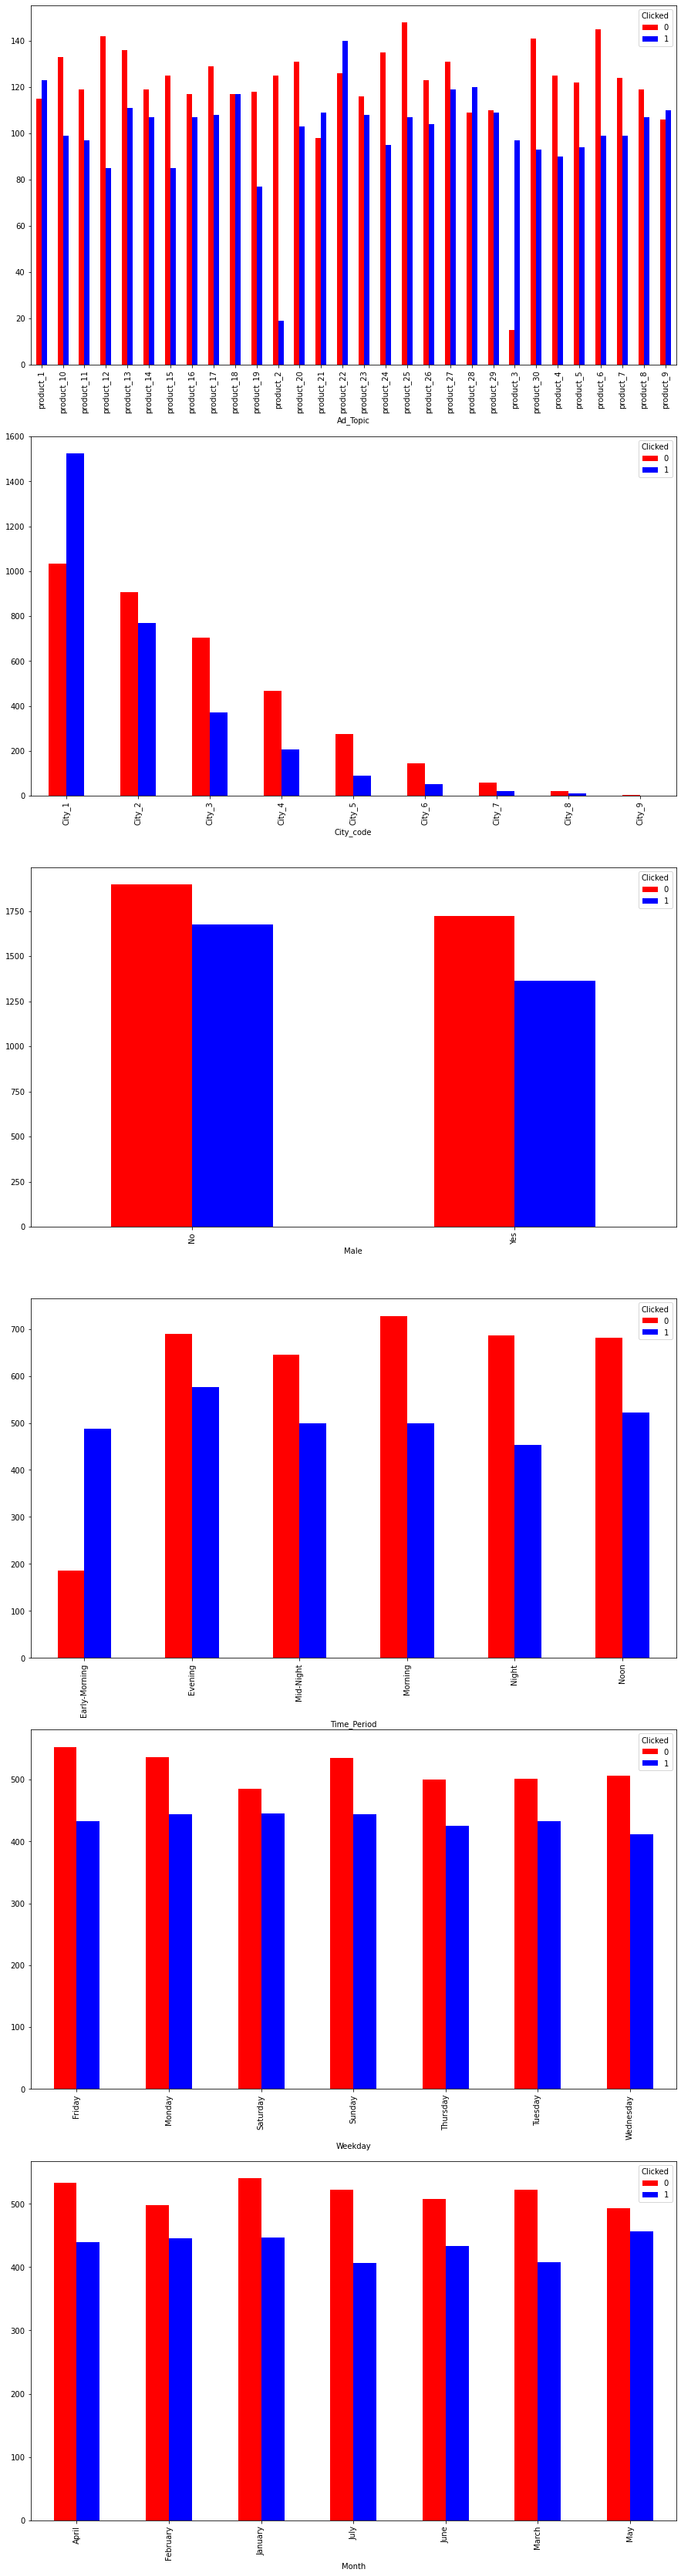

In [28]:
CategoricalColsList=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Clicked'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

# What to look for in these grouped bar charts?

    These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Month Vs Clicked plot. The Clicked vs Not-Clicked ratio for each month is similar, it means Month does not affect the Ad Click!. Hence, these two variables are not correlated.

    On the other hand, look at the Time_Period vs Clicked plot. The number of Clicks are very high in the Early Morning! It means Time_Period affects the Ad Click! Hence, two columns are correlated with each other.

    We confirm this analysis in below section by using Chi-Square Tests.

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
    Chi-Square test is conducted to check the correlation between two categorical variables

    Assumption(H0): The two columns are NOT related to each other
    Result of Chi-Sq Test: The Probability of H0 being True

In [29]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [30]:
CategoricalVariables=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

# Calling the function
FunctionChisq(inpData=data, 
              TargetVariable='Clicked',
              CategoricalVariablesList= CategoricalVariables)

Ad_Topic is correlated with Clicked | P-Value: 1.2676573604736464e-24
City_code is correlated with Clicked | P-Value: 2.6667953391697526e-88
Male is correlated with Clicked | P-Value: 0.02695171301745074
Time_Period is correlated with Clicked | P-Value: 4.465745015735695e-47
Weekday is NOT correlated with Clicked | P-Value: 0.7226317326250824
Month is NOT correlated with Clicked | P-Value: 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

# Selecting final predictors for Machine Learning
    Based on the above tests, selecting the final columns for machine learning

In [31]:
SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()


,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [32]:
DataForML.to_pickle('DataForML.pkl')


# Data Pre-processing for Machine Learning
    List of steps performed on predictor variables before data can be used for machine learning

    1. Converting each Ordinal Categorical columns to numeric
    2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
    3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
    4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

# Converting the binary nominal variable to numeric using 1/0 mapping

In [33]:
# Treating the binary nominal variables first
DataForML['Male'].replace({'Yes':1, 'No':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


# Converting the nominal variable to numeric using get_dummies()

In [34]:
DataForML_Numeric = pd.get_dummies(DataForML)
DataForML_Numeric['Clicked'] = data['Clicked']
DataForML_Numeric.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample

In [35]:
DataForML_Numeric.columns


Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [36]:
TargetVariable='Clicked'
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [37]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


# Standardization/Normalization of data

In [38]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 50)
(4659,)
(1998, 50)
(1998,)


# Build A model 

# 1. Logistic Regression


In [40]:
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
print(clf)
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)


LogisticRegression(C=1, solver='newton-cg')


In [41]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1080
           1       0.96      0.90      0.93       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.93      0.93      1998

[[1043   37]
 [  94  824]]


In [42]:
#Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.93


In [43]:
#Cross - validation
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]

Final Average Accuracy of the model: 0.93


# 2 . Decision Tree

In [44]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
print(clf)

Dtree = clf.fit(X_train,y_train)
prediction = Dtree.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [45]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1080
           1       0.89      0.90      0.90       918

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

[[976 104]
 [ 88 830]]


In [46]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.9


<AxesSubplot:>

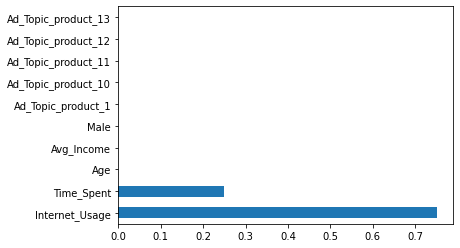

In [48]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Dtree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [50]:
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Dtree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.92022157 0.88081772 0.87852085 0.92454929 0.91859248 0.90248142
 0.89802557 0.93671902 0.92588299 0.90685001]

Final Average Accuracy of the model: 0.91


In [51]:
pip install dtreeplt

Note: you may need to restart the kernel to use updated packages.


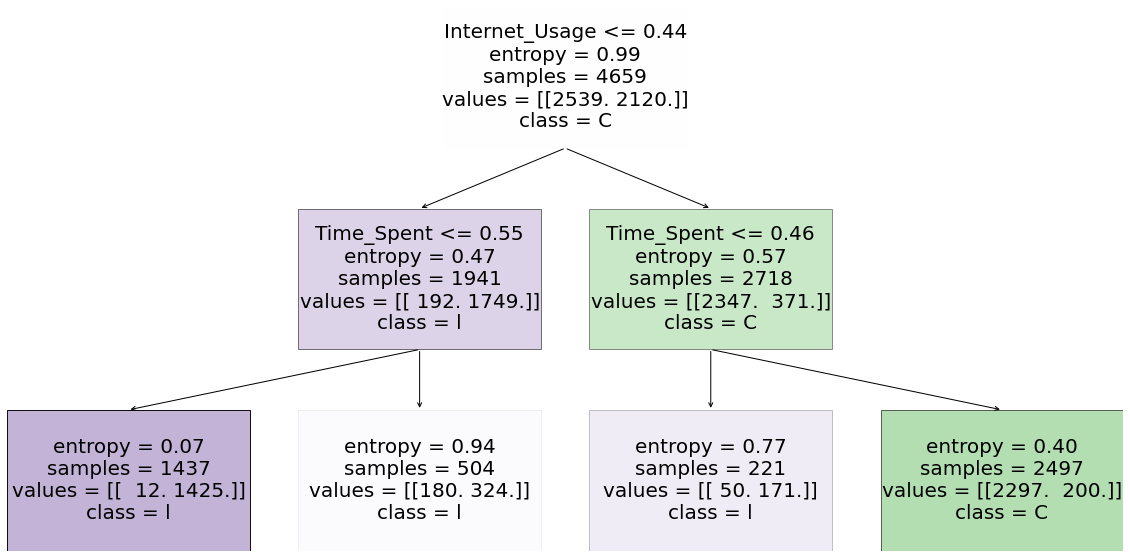

In [52]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

# 3. Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)



RandomForestClassifier(max_depth=2)


In [54]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))



              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1080
           1       0.98      0.83      0.90       918

    accuracy                           0.91      1998
   macro avg       0.93      0.91      0.91      1998
weighted avg       0.92      0.91      0.91      1998

[[1065   15]
 [ 158  760]]


In [55]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



Accuracy of the model on Testing Sample Data: 0.91


In [56]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



Accuracy values for 10-fold Cross Validation:
 [0.92603945 0.88676517 0.90755131 0.92740978 0.91647518 0.94246372
 0.92434052 0.93963164 0.92561684 0.89928947]

Final Average Accuracy of the model: 0.92


<AxesSubplot:>

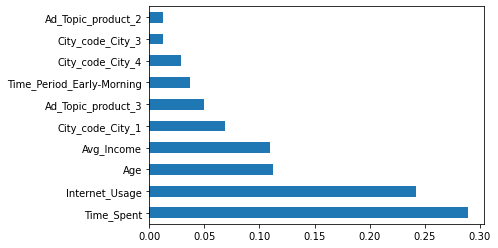

In [57]:

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

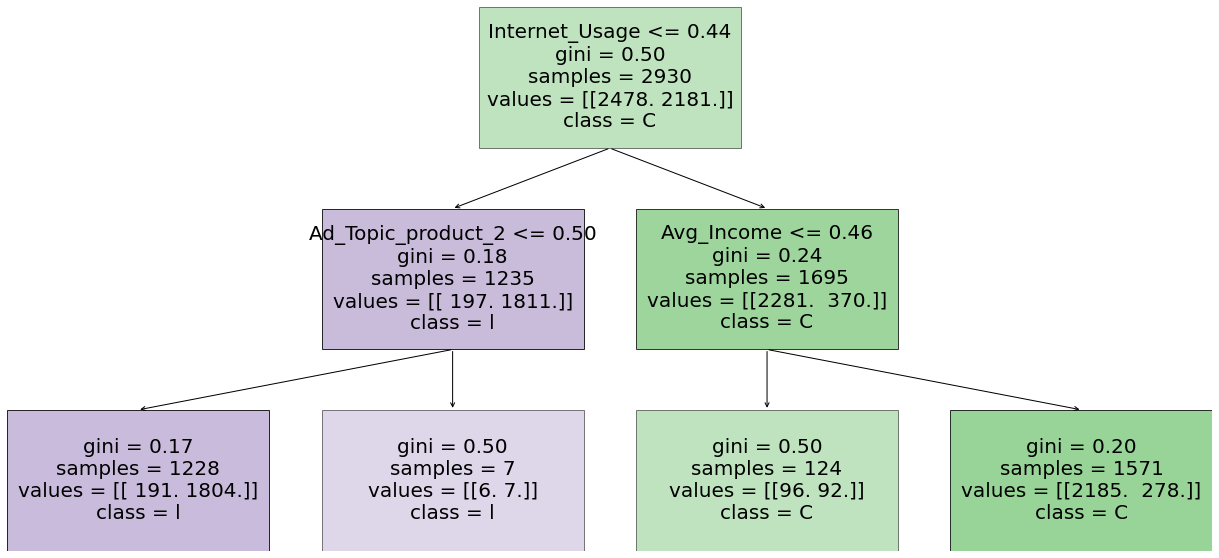

In [58]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# 4. ADA BOOST

In [59]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)


In [63]:

# Measuring accuracy on Testing Data
from sklearn import metrics
print("******************* CLASSIFICATION REPORT *************")
print(metrics.classification_report(y_test, prediction))
print("******************* CONFUSION MATRIX*************")
print(metrics.confusion_matrix(y_test, prediction))

print("******************* Overall Accuracy of the model *************")
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



******************* CLASSIFICATION REPORT *************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1080
           1       0.97      0.89      0.93       918

    accuracy                           0.94      1998
   macro avg       0.94      0.93      0.94      1998
weighted avg       0.94      0.94      0.94      1998

******************* CONFUSION MATRIX*************
[[1052   28]
 [  99  819]]
******************* Overall Accuracy of the model *************
Accuracy of the model on Testing Sample Data: 0.94


<AxesSubplot:>

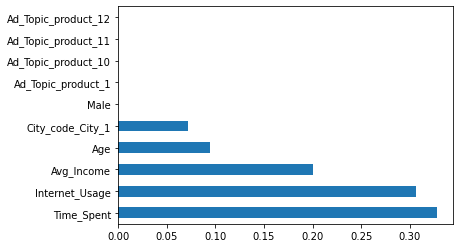

In [64]:

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

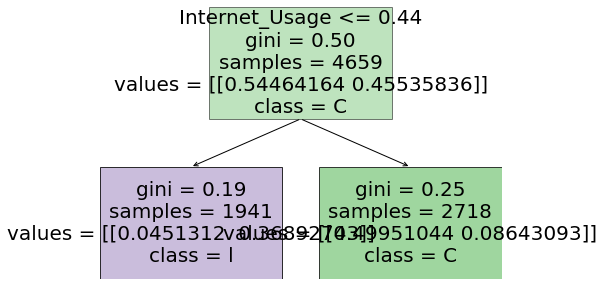

In [65]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# 5 KNN

In [67]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1080
           1       0.75      0.66      0.70       918

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998

[[874 206]
 [311 607]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.75843342 0.75583557 0.7433355  0.78247402 0.74582845 0.74049448
 0.75483191 0.76644885 0.73787474 0.75479348]

Final Average Accuracy of the model: 0.75


# 6 SVM

In [68]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1080
           1       0.97      0.88      0.92       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1052   28]
 [ 107  811]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.93839432 0.89506222 0.92160758 0.93512863 0.93353373 0.94259731
 0.94415224 0.94729481 0.94107037 0.93204514]

Final Average Accuracy of the model: 0.93


# Deployment of the Model
    Based on the above trials you select that algorithm which produces the best average accuracy. 
    In this case, multiple algorithms have produced similar kind of average accuracy.
    Hence, we can choose any one of them.

    I am choosing Adaboost as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

    In order to deploy the model we follow below steps

    1.Train the model using 100% data available
    2.Save the model as a serialized file which can be stored anywhere
    3.Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

# Step 1. Retraining the model using 100% data and only the best variables


In [69]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
# Best predictors based on the multiple variable importance charts above
Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [70]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

# Step 2. Save the model as a serialized file which can be stored anywhere


In [72]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Model
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: I:\python\jupyuter notebook\self\ml algo practise


# Step 3. Create a python function

In [74]:
def PredictClickStatus(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating the binary nominal variables first
    # Every column which was converted to numeric has to be converted here as well
    InputData['Male'].replace({'Yes':1, 'No':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]    
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['ClickPrediction'])
    return(PredictedStatus)

In [75]:
DataForML[["Time_Spent", "Avg_Income", "Internet_Usage"]].head()

,Time_Spent,Avg_Income,Internet_Usage
0,87.97,55901.12,185.46
1,51.63,39132.00,176.73
2,82.37,57032.36,210.60
3,62.06,48868.00,190.05
4,77.66,61608.23,204.86


In [76]:
NewAds=pd.DataFrame(
data=[[87.97,55901.12, 185.46],
     [51.63, 5039132.00, 176.73],
     [51.63, 5039132.00, 176.73]],
columns=["Time_Spent", "Avg_Income", "Internet_Usage"])

# Calling the Function for prediction and storing with the input data
NewAds['ClickPrediction']=PredictClickStatus(InputData= NewAds)
NewAds


,Time_Spent,Avg_Income,Internet_Usage,ClickPrediction
0,87.97,55901.12,185.46,0
1,51.63,5039132.00,176.73,1
2,51.63,5039132.00,176.73,1


# FLASK API

In [77]:
# Creating the function which can take Ad inputs and perform prediction
"Time_Spent", "Avg_Income", "Internet_Usage"
def FunctionClickPrediction(inp_Time_Spent, inp_Avg_Income, inp_Internet_Usage):
    SampleInputData=pd.DataFrame(
     data=[[inp_Time_Spent, inp_Avg_Income, inp_Internet_Usage]],
     columns=["Time_Spent", "Avg_Income", "Internet_Usage"])

    # Calling the function defined above using the input parameters
    Predictions=PredictClickStatus(InputData= SampleInputData)

    # Returning the predicted Clicked status
    return(Predictions.to_json())

# Function call
FunctionClickPrediction(inp_Time_Spent=40.97, 
                       inp_Avg_Income=55901.12,
                       inp_Internet_Usage=195.46
                       )


'{"ClickPrediction":{"0":1}}'

In [78]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [79]:
app = Flask(__name__)
@app.route('/get_click_prediction', methods=["GET"])
def get_click_prediction():
    try:
        # Getting the paramters from API call
        Time_Spent_value = float(request.args.get('Time_Spent'))
        Avg_Income_value = float(request.args.get('Avg_Income'))
        Internet_Usage_value=float(request.args.get('Internet_Usage'))
                
        # Calling the funtion to get click status
        prediction_from_api=FunctionClickPrediction(inp_Time_Spent=Time_Spent_value,
                               inp_Avg_Income=Avg_Income_value, 
                               inp_Internet_Usage=Internet_Usage_value,
                               )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Nov/2021 12:43:13] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Nov/2021 12:43:13] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Nov/2021 12:43:35] "GET /get_click_prediction?Time_Spent=40.97&Avg_Income=55901.12&Internet_Usage=195.46 HTTP/1.1" 200 -


In [ ]:
http://127.0.0.1:8080/get_click_prediction?Time_Spent=40.97&Avg_Income=55901.12&Internet_Usage=195.46